# Práctica. Segmentación de imagenes (caso binario)
Grape leaf project

<div class="alert alert-block alert-success">
<b>Resumen:</b> Gaussian Mixture Model Explained.
</div>

***

## Instalando librerias de Machine Learning 

Instrucciones para instalar <b>scikit-learn</b> en un entorno virtual de Anaconda llamado <b>cv2</b>, desde la consola:

- Abrir la Consola de Anaconda.
- Activar el Entorno Virtual cv2.
    - conda activate cv2
- Instalar scikit-learn:
    - conda install scikit-learn
- Confirmar la Instalación: Anaconda te mostrará una lista de paquetes que se instalarán o actualizarán. Escribe [y] y presiona Enter para confirmar.
- Verificar la Instalación: Una vez completada la instalación, puedes verificar que scikit-learn se instaló correctamente ejecutando Python en la consola e importando la librería:
    - python
- En el intérprete de Python, escribe:
    - import sklearn
    - print(sklearn.`__version__`)
- Esto debería mostrar la versión instalada de scikit-learn, confirmando que la instalación fue exitosa.

***

In [1]:
import cv2
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm

***

## 1. Gaussian Mixture Model 

El <b>Modelo de Mezcla Gaussiana</b> (<b>GMM</b>, por sus siglas en inglés) es un enfoque estadístico que representa la distribución de datos como una combinación de múltiples distribuciones gaussianas (normales). Cada componente gaussiano en el modelo representa una subpoblación o cluster dentro de los datos.

El objetivo principal del GMM es estimar los parámetros (medias, covarianzas y pesos) de estas distribuciones gaussianas que, al combinarse, modelan adecuadamente la distribución global de los datos.

El algoritmo típico para ajustar un GMM a un conjunto de datos es el Algoritmo de Expectación-Maximización (EM), que funciona de la siguiente manera:

- <b>Inicialización</b>: Se asignan valores iniciales a los parámetros de los componentes gaussianos:
    - Medias: Valores centrales de cada componente.
    - Covarianzas: Dispersión o forma de cada componente.
    - Pesos: Importancia relativa de cada componente en la mezcla.
- <b>Paso de Expectación</b> (E):
    - Se calcula la probabilidad posterior de que cada dato pertenezca a cada componente gaussiano, dadas las estimaciones actuales de los parámetros.
    - Esto implica calcular las responsabilidades, que indican qué tan probable es que un dato haya sido generado por un componente específico.
- <b>Paso de Maximización</b> (M):
    - Se actualizan los parámetros de los componentes gaussianos utilizando las responsabilidades calculadas en el paso E.
    - Las nuevas estimaciones de medias, covarianzas y pesos se calculan para maximizar la verosimilitud de los datos dados los parámetros actuales.
- <b>Convergencia</b>:
    - Se repiten los pasos E y M iterativamente hasta que los cambios en los parámetros sean menores que un umbral predefinido o se alcance un número máximo de iteraciones.
    - El criterio de convergencia suele basarse en la variación de la verosimilitud o en la estabilidad de los parámetros.

<b>Ventajas del GMM:</b>

- Flexibilidad: Puede modelar distribuciones de datos complejas y multimodales.
- Probabilidades suaves (soft): Proporciona probabilidades de pertenencia, lo que permite una asignación de clusters no estricta.
- Uso: Útil en diversas áreas como segmentación de imágenes, reconocimiento de patrones y agrupamiento.

<b> Limitaciones del GMM:</b>

- Sensibilidad a la inicialización: Los resultados pueden depender de los valores iniciales de los parámetros.
- Óptimos locales: El algoritmo EM puede converger a soluciones subóptimas.
- Selección del número de componentes: Determinar el número adecuado de gaussianas es dificil y suele requerir criterios adicionales como BIC o AIC.

En resumen, el GMM es una herramienta potente para modelar datos que provienen de múltiples fuentes gaussianas, permitiendo una representación más precisa de la estructura subyacente de los datos y facilitando tareas de clasificación y análisis.

***

## 2. Función para calcular GMM a partir de un histograma

Calcula el GMM a partir de un histograma y devuelve las medias, desviaciones estándar y pesos.

Parámetros:

- histogram (numpy.ndarray): Histograma 1D de la imagen.
- n_components (int): Número de componentes gaussianos a ajustar.

Regresa:
- means (numpy.ndarray): Medias de los componentes gaussianos.
- std_devs (numpy.ndarray): Desviaciones estándar de los componentes gaussianos.
- weights (numpy.ndarray): Pesos de los componentes gaussianos.

In [2]:
def gmm_from_histogram(histograma, n_componentes):
    # Asegurarse de que el histograma es un arreglo 1D
    histograma = histograma.flatten()
    
    # Crear un arreglo de valores de intensidad (0 a 255)
    bins = np.arange(len(histograma))

    # Expandir el histograma en datos repetidos según la cuenta de cada bin
    datos = np.repeat(bins, histograma.astype(int))

    # Reestructurar los datos para que sean compatibles con scikit-learn
    datos = datos.reshape(-1, 1)

    # Verificar si hay datos suficientes para ajustar el GMM
    if len(datos) < n_componentes:
        raise ValueError("No hay suficientes datos para el número de componentes especificado.")

    # Ajustar el Modelo de Mezcla Gaussiana
    gmm = GaussianMixture(n_components=n_componentes, covariance_type='diag', random_state=0)
    gmm.fit(datos)

    # Obtener las medias y desviaciones estándar
    means = gmm.means_.flatten()
    std_devs  = np.sqrt(gmm.covariances_.flatten())
    weights = gmm.weights_.flatten()

    return means, std_devs, weights

***

## 2. Calculo de histogramas y de sus respectivos modelos Gaussianos 

### 2.1 Histrogramas

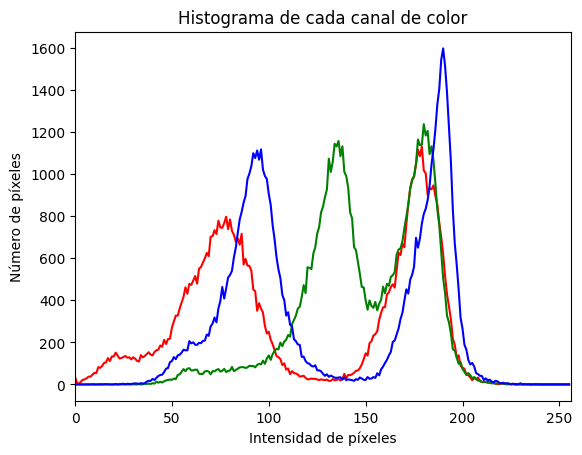

In [3]:
# Leer la imagen en color
imagen = cv2.imread('leaf_1.JPG')
#imagen = cv2.GaussianBlur(imagen, (5, 5), 0) #comparar sin/con filtro

# Verificar que la imagen fue cargada correctamente
if imagen is None:
    print("Error: No se pudo cargar la imagen.")
    exit()

histogramas = []

# Calcular el histograma para cada canal de color (B, G, R)
canales = ('r' ,'g', 'b')
for i, canal in enumerate(canales):
    hist = cv2.calcHist([imagen], [i], None, [256], [0, 256])
    histogramas.append(hist)
    plt.plot(hist, color=canal)
    plt.xlim([0, 256])

# Mostrar los histogramas en una ventana
plt.title('Histograma de cada canal de color')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Número de píxeles')
plt.show()

## 2.2. GMM

In [4]:
means, std_devs, weights  = gmm_from_histogram(histogramas[0],2)
print(means)
print(std_devs)
print(weights)

[176.09612586  70.54471552]
[12.13972864 23.05652227]
[0.45985018 0.54014982]


***

## 2.3. Función para visualizar de los modelos

Grafica modelos gaussianos dados las medias, desviaciones estándar y pesos opcionales sobre un rango especificado.

Parámetros:

- means (array-like): Medias de los componentes gaussianos.
- std_devs (array-like): Desviaciones estándar de los componentes gaussianos.
- weights (array-like, opcional): Pesos de los componentes gaussianos. Si es None, asume pesos iguales.
- x_range (tuple, opcional): El rango (mínimo, máximo) sobre el cual graficar las gaussianas.
- num_points (int, opcional): Número de puntos en el eje x para graficar.

Retorna:
- None

In [5]:
def plot_gaussian_models(means, std_devs, weights=None, x_range=(0, 255), num_points=1000):
    x = np.linspace(x_range[0], x_range[1], num_points)
    total_pdf = np.zeros_like(x)

    # If weights are not provided, assume equal weights
    if weights is None:
        weights = np.ones(len(means)) / len(means)

    # Plot each Gaussian component
    for mean, std_dev, weight in zip(means, std_devs, weights):
        pdf = weight * norm.pdf(x, mean, std_dev)
        plt.plot(x, pdf, label=f'Gaussian(mean={mean:.2f}, std={std_dev:.2f})')
        total_pdf += pdf

    # Plot the sum of the Gaussian components
    plt.plot(x, total_pdf, label='Sum of Gaussians', color='black', linewidth=1)

    plt.legend()
    plt.xlabel('Intensity')
    plt.ylabel('Probability Density')
    plt.title('Gaussian Models')
    plt.show()

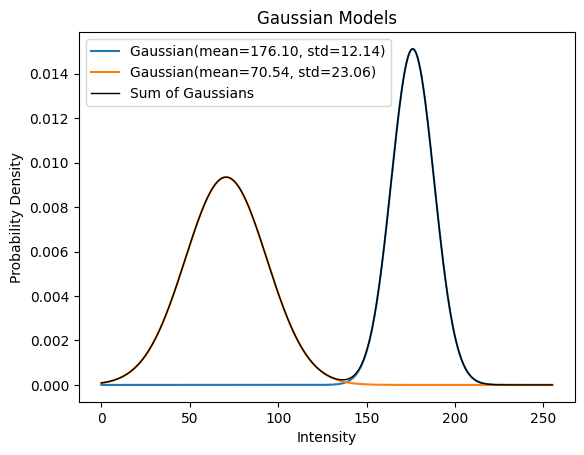

In [6]:
# Plot the Gaussian models
plot_gaussian_models(means, std_devs, weights, x_range=(0, 255))